<a href="https://colab.research.google.com/github/EmmanueDavidL/Ciencia_De_Datos2025/blob/main/TrabajoPropio27_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Datos cargados correctamente. Tamaño: (20000, 54)

Distribución del estilo de vida saludable:
Healthy_Lifestyle
No saludable    15303
Saludable        4697
Name: count, dtype: int64


/tmp/ipython-input-1526294353.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




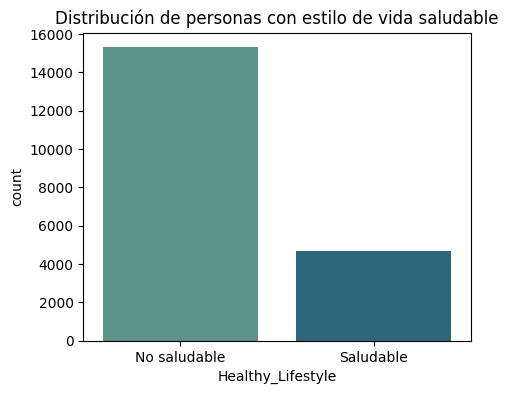


🌟 Variables más importantes para un estilo de vida saludable:


,0
Fat_Percentage,0.307263
Workout_Frequency (days/week),0.187246
Water_Intake (liters),0.095104
BMI,0.084010
Experience_Level,0.042328
Weight (kg),0.039838
lean_mass_kg,0.028896
Session_Duration (hours),0.024618
Height (m),0.024025
protein_per_kg,0.017908


/tmp/ipython-input-1526294353.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




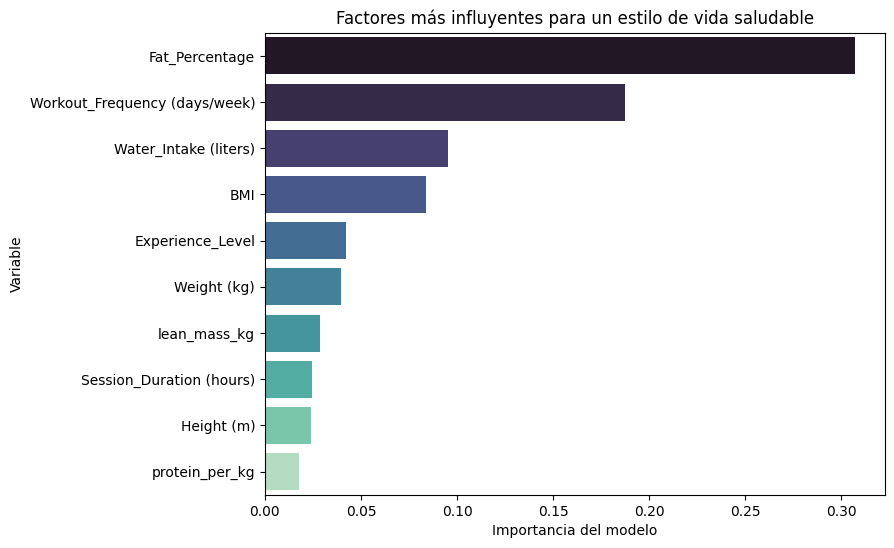

/tmp/ipython-input-1526294353.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




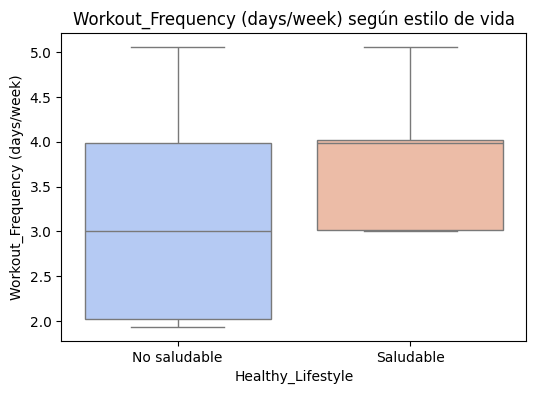

/tmp/ipython-input-1526294353.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




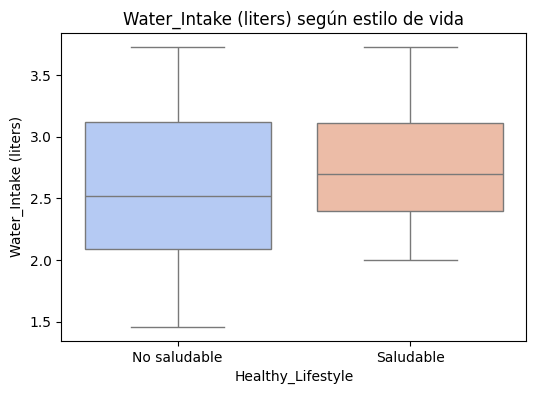

/tmp/ipython-input-1526294353.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




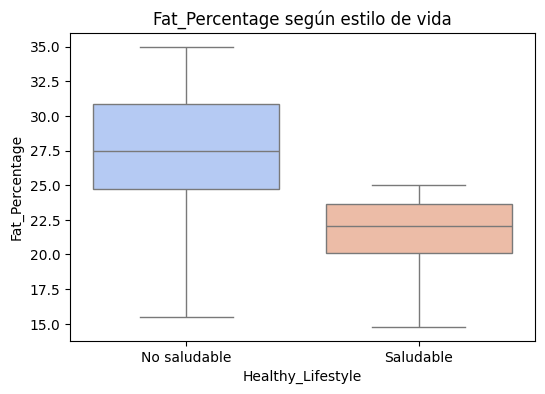

/tmp/ipython-input-1526294353.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




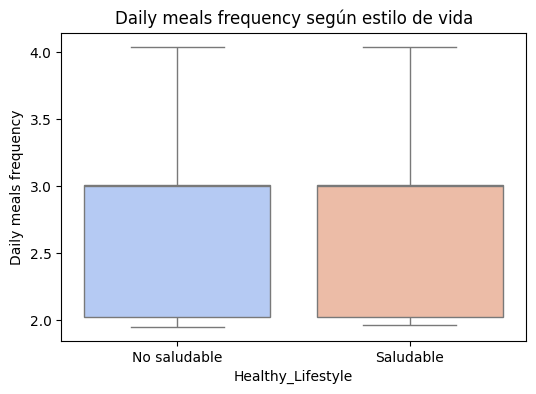


💬 Conclusión:
Los factores que más influyen en un estilo de vida saludable, según los datos, son:
- Mantener una hidratación adecuada (2 litros o más al día).
- Tener un bajo porcentaje de grasa corporal.
- Comer de forma equilibrada y con frecuencia regular.
- Participar activamente en rutinas físicas o deportivas.

Estos hábitos representan un equilibrio entre actividad, nutrición e hidratación,
componentes esenciales de una vida saludable.



In [18]:
# --- EDA: Factores relacionados con un estilo de vida saludable ---
# (sin variables de calorías ni "BMI_calc")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Paso 1: Cargar datos
df = pd.read_csv("Final_data.csv")
print("✅ Datos cargados correctamente. Tamaño:", df.shape)

# Paso 2: Crear variable objetivo “Healthy_Lifestyle”
df["Healthy_Lifestyle"] = np.where(
    (df["Workout_Frequency (days/week)"] >= 3) &
    (df["Water_Intake (liters)"] >= 2) &
    (df["Fat_Percentage"] < 25),
    "Saludable", "No saludable"
)

print("\nDistribución del estilo de vida saludable:")
print(df["Healthy_Lifestyle"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x="Healthy_Lifestyle", data=df, palette="crest")
plt.title("Distribución de personas con estilo de vida saludable")
plt.show()

# Paso 3: Eliminar solo "BMI_calc" y variables redundantes de calorías
cols_drop = [c for c in df.columns if "BMI_calc" in c or "Calorie" in c or "cal_" in c or "expected_burn" in c]
df = df.drop(columns=cols_drop, errors="ignore")

# Paso 4: Preparar datos
X = df.drop(columns=["Healthy_Lifestyle"])
y = df["Healthy_Lifestyle"]

# Codificar variables categóricas
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

y = LabelEncoder().fit_transform(y.astype(str))

# Paso 5: Entrenar modelo Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Paso 6: Mostrar resultados
print("\n🌟 Variables más importantes para un estilo de vida saludable:")
display(importances.head(10))

plt.figure(figsize=(8,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="mako")
plt.title("Factores más influyentes para un estilo de vida saludable")
plt.xlabel("Importancia del modelo")
plt.ylabel("Variable")
plt.show()

#Graficos
cols_to_plot = [
    'Workout_Frequency (days/week)',
    'Water_Intake (liters)',
    'Fat_Percentage',
    'Daily meals frequency'
]

for col in cols_to_plot:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(
            x='Healthy_Lifestyle',
            y=col,
            data=df,
            palette="coolwarm",
            showfliers=False  # 👈 esto elimina las bolitas (outliers)
        )
        plt.title(f"{col} según estilo de vida")
        plt.show()
    else:
        print(f"⚠️ Columna '{col}' no encontrada, omitida del gráfico.")

# Paso 8: Conclusión textual
print("""
💬 Conclusión:
Los factores que más influyen en un estilo de vida saludable, según los datos, son:
- Mantener una hidratación adecuada (2 litros o más al día).
- Tener un bajo porcentaje de grasa corporal.
- Comer de forma equilibrada y con frecuencia regular.
- Participar activamente en rutinas físicas o deportivas.

Estos hábitos representan un equilibrio entre actividad, nutrición e hidratación,
componentes esenciales de una vida saludable.
""")
